# Q1

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set problem parameters
n = 30
m = 0
s = 1
x = stats.norm(loc=m, scale=s).rvs(size=n)
C, G = 2, 1000  # Chains and Gibbs samples
theta, tau = np.zeros([C, G]), np.zeros([C, G])
theta[:, 0] = 1000  # Initializing theta

# Log probability function to avoid numerical issues
def log_tau_target(tau_, theta_, x):
    """ Computes log of the unnormalized posterior for tau. """
    if tau_ <= 0:
        return -np.inf  # Log of a non-positive value is undefined
    
    log_likelihood = np.sum(stats.norm.logpdf(x, loc=theta_, scale=1/np.sqrt(tau_)))
    log_prior = stats.gamma(a=1, scale=1).logpdf(tau_)
    return log_likelihood + log_prior

def log_theta_target(theta_, tau_, x):
    """ Computes log of the unnormalized posterior for theta. """
    log_likelihood = np.sum(stats.norm.logpdf(x, loc=theta_, scale=1/np.sqrt(max(tau_, 1e-6))))
    log_prior = stats.norm(0, 1).logpdf(theta_)
    return log_likelihood + log_prior

# Main Gibbs sampler with Metropolis-Hastings steps
for c in range(C):
    for g in range(1, G):
        # --- Sample tau using Metropolis-Hastings ---
        tau_proposal = stats.expon(scale=2)
        tau_tilde = tau_proposal.rvs()

        log_mh_ratio = (log_tau_target(tau_tilde, theta[c, g-1], x) - 
                        log_tau_target(tau[c, g-1], theta[c, g-1], x) + 
                        tau_proposal.logpdf(tau[c, g-1]) - 
                        tau_proposal.logpdf(tau_tilde))

        acceptance_probability = np.exp(min(0, log_mh_ratio))  # Convert log back to probability
        if stats.uniform().rvs() < acceptance_probability:
            tau[c, g] = tau_tilde
        else:
            tau[c, g] = tau[c, g-1]
        
        # --- Sample theta using Metropolis-Hastings ---
        theta_proposal = stats.norm(loc=theta[c, g-1], scale=1)
        theta_tilde = theta_proposal.rvs()

        log_mh_ratio_theta = (log_theta_target(theta_tilde, tau[c, g], x) - 
                              log_theta_target(theta[c, g-1], tau[c, g], x) + 
                              theta_proposal.logpdf(theta[c, g-1]) - 
                              theta_proposal.logpdf(theta_tilde))

        acceptance_probability_theta = np.exp(min(0, log_mh_ratio_theta))  # Convert log back to probability
        if stats.uniform().rvs() < acceptance_probability_theta:
            theta[c, g] = theta_tilde
        else:
            theta[c, g] = theta[c, g-1]


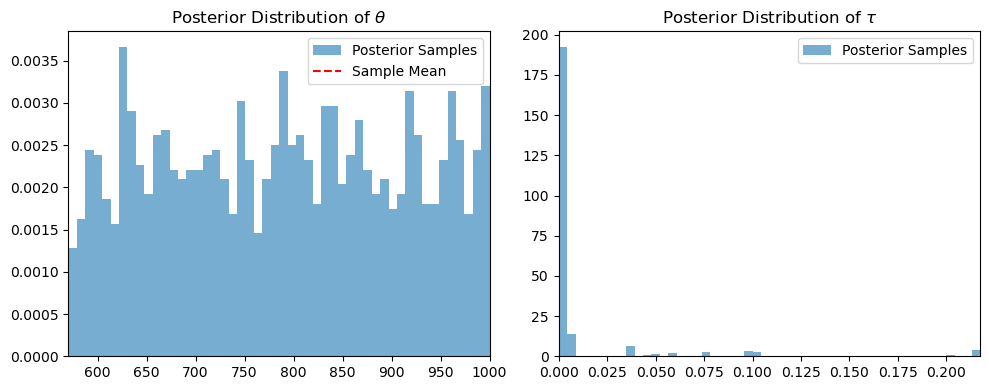

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Compute the range for θ and τ
theta_min, theta_max = np.min(theta), np.max(theta)
tau_min, tau_max = np.min(tau), np.max(tau)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # One row, two columns

# Plot posterior samples of θ
axes[0].hist(theta.flatten(), bins=50, density=True, alpha=0.6, label="Posterior Samples")
axes[0].axvline(np.mean(x), color="red", linestyle="--", label="Sample Mean")
axes[0].set_xlim(theta_min, theta_max)
axes[0].set_title(r"Posterior Distribution of $\theta$")
axes[0].legend()

# Plot posterior samples of τ
axes[1].hist(tau.flatten(), bins=50, density=True, alpha=0.6, label="Posterior Samples")
axes[1].set_xlim(tau_min, tau_max)
axes[1].set_title(r"Posterior Distribution of $\tau$")
axes[1].legend()

plt.tight_layout()
plt.show()

# Q2

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set problem parameters
n = 30
m = 0
s = 1
x = stats.norm(loc=m, scale=s).rvs(size=n)
C, G = 2, 1000  # Chains and Gibbs samples
theta, tau = np.zeros([C, G]), np.zeros([C, G])
theta[:, 0] = 1000  # Initializing theta

# Log probability function to avoid numerical issues
def log_tau_target(tau_, theta_, x):
    """ Computes log of the unnormalized posterior for tau. """
    if tau_ <= 0:
        return -np.inf  # Log of a non-positive value is undefined
    
    log_likelihood = np.sum(stats.norm.logpdf(x, loc=theta_, scale=1/np.sqrt(tau_)))
    log_prior = stats.gamma(a=1, scale=1).logpdf(tau_)
    return log_likelihood + log_prior

def log_theta_target(theta_, tau_, x):
    """ Computes log of the unnormalized posterior for theta. """
    log_likelihood = np.sum(stats.norm.logpdf(x, loc=theta_, scale=1/np.sqrt(max(tau_, 1e-6))))
    log_prior = stats.gamma(1, 1).logpdf(theta_)
    return log_likelihood + log_prior

# Main Gibbs sampler with Metropolis-Hastings steps
for c in range(C):
    for g in range(1, G):
        # --- Sample tau using Metropolis-Hastings ---
        tau_proposal = stats.truncnorm(a=-tau[c,g-1], b=np.inf,
                loc=tau[c,g-1], scale=s)
        tau_tilde = tau_proposal.rvs()

        log_mh_ratio = (log_tau_target(tau_tilde, theta[c, g-1], x) - 
                        log_tau_target(tau[c, g-1], theta[c, g-1], x) + 
                        tau_proposal.logpdf(tau[c, g-1]) - 
                        tau_proposal.logpdf(tau_tilde))

        acceptance_probability = np.exp(min(0, log_mh_ratio))  # Convert log back to probability
        if stats.uniform().rvs() < acceptance_probability:
            tau[c, g] = tau_tilde
        else:
            tau[c, g] = tau[c, g-1]
        
        # --- Sample theta using Metropolis-Hastings ---
        theta_proposal = stats.norm(loc=theta[c, g-1], scale=1)
        theta_tilde = theta_proposal.rvs()

        log_mh_ratio_theta = (log_theta_target(theta_tilde, tau[c, g], x) - 
                              log_theta_target(theta[c, g-1], tau[c, g], x) + 
                              theta_proposal.logpdf(theta[c, g-1]) - 
                              theta_proposal.logpdf(theta_tilde))

        acceptance_probability_theta = np.exp(min(0, log_mh_ratio_theta))  # Convert log back to probability
        if stats.uniform().rvs() < acceptance_probability_theta:
            theta[c, g] = theta_tilde
        else:
            theta[c, g] = theta[c, g-1]


KeyboardInterrupt: 

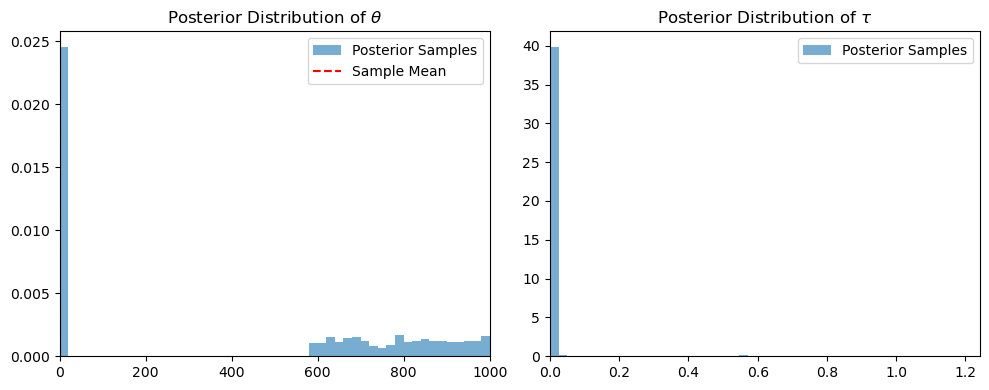

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Compute the range for θ and τ
theta_min, theta_max = np.min(theta), np.max(theta)
tau_min, tau_max = np.min(tau), np.max(tau)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # One row, two columns

# Plot posterior samples of θ
axes[0].hist(theta.flatten(), bins=50, density=True, alpha=0.6, label="Posterior Samples")
axes[0].axvline(np.mean(x), color="red", linestyle="--", label="Sample Mean")
axes[0].set_xlim(theta_min, theta_max)
axes[0].set_title(r"Posterior Distribution of $\theta$")
axes[0].legend()

# Plot posterior samples of τ
axes[1].hist(tau.flatten(), bins=50, density=True, alpha=0.6, label="Posterior Samples")
axes[1].set_xlim(tau_min, tau_max)
axes[1].set_title(r"Posterior Distribution of $\tau$")
axes[1].legend()

plt.tight_layout()
plt.show()

# Q3

0.25 = 0.5*0.5

0.5+(0.5)(1-(1/3)/(2/3))=0.75

0.5-0.5(1-(1/3)/(1/3))=0.25